In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mpg 데이터

In [137]:
mpg = pd.read_csv("C:/Users/samsung/Desktop/datasets/mpg.csv")

In [138]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [139]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


<AxesSubplot:>

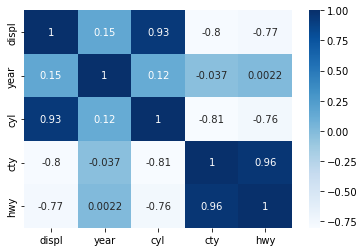

In [140]:
sns.heatmap(mpg.corr(), annot = True, cmap = 'Blues')

시각화

1) 제조사별 연비 (cty, hwy)

In [141]:
# 제조사별로 그룹화 후 cty와 hwy의 평균을 구함
manufacturer = mpg.groupby('manufacturer')[['cty', 'hwy']].mean().reset_index()

<AxesSubplot:xlabel='manufacturer'>

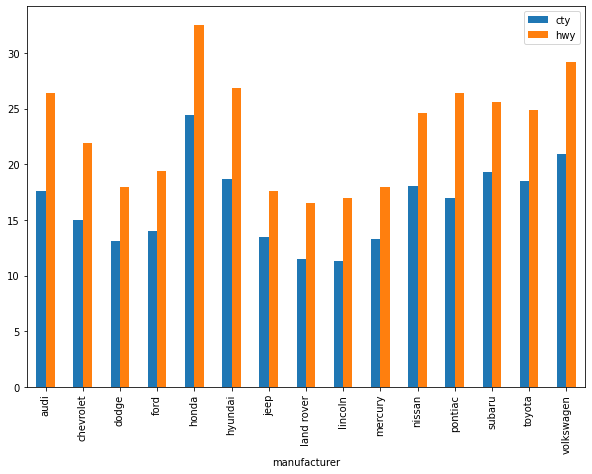

In [142]:
# cty가 높은 경우 hwy도 높은 경향이 있음
# honda, volksvagen, pontiac, audi 순으로 높음
manufacturer.plot(kind = 'bar', x = 'manufacturer', y = ['cty', 'hwy'], figsize = (10,7))

2) displ에 따른 연비

In [143]:
mpg['displ'].describe()

count    234.000000
mean       3.471795
std        1.291959
min        1.600000
25%        2.400000
50%        3.300000
75%        4.600000
max        7.000000
Name: displ, dtype: float64

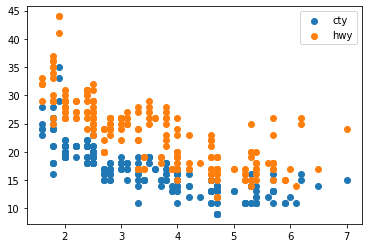

In [144]:
# displ와 cty, hwy의 상관관계 확인하기
# 음의 상관관계가 있는 것으로 확인 (displ가 높을수록 cty, hwy는 낮음)
plt.scatter(x = mpg['displ'], y = mpg['cty'], label = 'cty')
plt.scatter(x = mpg['displ'], y = mpg['hwy'], label = 'hwy')
plt.legend()

3) cyl 개수에 따른 cty, hwy

In [145]:
mpg['cyl'].value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [146]:
cyl = mpg.groupby('cyl')[['cty', 'hwy']].mean().reset_index()
cyl

,cyl,cty,hwy
0,4,21.012346,28.802469
1,5,20.500000,28.750000
2,6,16.215190,22.822785
3,8,12.571429,17.628571


<AxesSubplot:xlabel='cyl'>

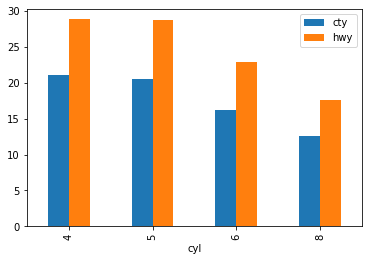

In [147]:
# 실린더 개수가 많을수록 연비가 떨어지는 경향이 있음을 파악
cyl.plot(kind = 'bar', x = 'cyl', y = ['cty', 'hwy'])

4) trans 종류에 따른 cty, hwy

In [148]:
mpg['trans'].value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [149]:
trans_mean = mpg.groupby('trans')[['cty', 'hwy']].mean().reset_index()
trans_mean

,trans,cty,hwy
0,auto(av),20.000000,27.800000
1,auto(l3),21.000000,27.000000
2,auto(l4),15.939759,21.963855
3,auto(l5),14.717949,20.717949
4,auto(l6),13.666667,20.000000
5,auto(s4),18.666667,25.666667
6,auto(s5),17.333333,25.333333
7,auto(s6),17.375000,25.187500
8,manual(m5),19.258621,26.293103
9,manual(m6),16.894737,24.210526


<AxesSubplot:xlabel='trans'>

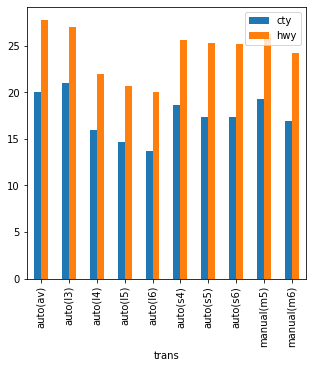

In [150]:
# trans에 따른 cty, hwy 확인
# auto(av), manual(m5)가 가장 높음
trans_mean.plot(kind = 'bar', x = 'trans', y = ['cty', 'hwy'], figsize = (5,5))

In [151]:
# trans를 auto와 manual로 분류
trans = []
for i in mpg['trans'] :
    if i[0] == 'a' :
        trans.append('auto')
    else :
        trans.append('manual')
        
trans

['auto',
 'manual',
 'manual',
 'auto',
 'auto',
 'manual',
 'auto',
 'manual',
 'auto',
 'manual',
 'auto',
 'auto',
 'manual',
 'auto',
 'manual',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'manual',
 'auto',
 'manual',
 'auto',
 'manual',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'manual',
 'auto',
 'auto',
 'manual',
 'auto',
 'auto',
 'auto',
 'manual',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'manual',
 'auto',
 'auto',
 'auto',
 'manual',
 'manual',
 'auto',
 'manual',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'manual',
 'auto',
 'auto',
 'auto',
 'auto',
 'auto',
 'manual',
 'manual',
 'auto',
 'auto',
 'auto',
 'auto',
 'manual',
 'auto',
 'manual',
 'auto',
 'auto',
 'manual',
 'manual',
 'auto',
 'manual',
 'manual',
 'auto',
 'manual',
 'manual',
 'auto',
 'manual

In [152]:
# 새로운 열 생성
mpg_2 = mpg.copy()
mpg_2['trans_group'] = trans

In [153]:
# auto/mobile에 따른 연비 비교
trans_group = mpg_2.groupby('trans_group')[['cty', 'hwy']].mean().reset_index()
trans_group

,trans_group,cty,hwy
0,auto,15.968153,22.292994
1,manual,18.675325,25.779221


<AxesSubplot:xlabel='trans_group'>

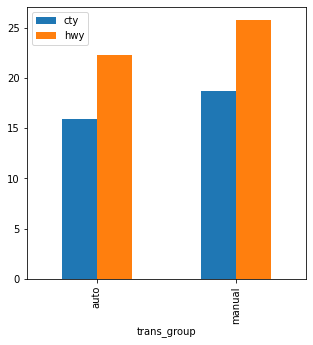

In [154]:
# auto/manual에 따른 연비 시각화
# manual이 auto보다 높은 편이지만, 유의미한 차이는 아닌 것으로 보임
trans_group.plot(kind = 'bar', x = 'trans_group', y = ['cty', 'hwy'], figsize = (5,5))

5) clas에 따른 cty, hwy

In [155]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [156]:
class_group = mpg.groupby('class')[['cty', 'hwy']].mean().reset_index()
class_group

,class,cty,hwy
0,2seater,15.400000,24.800000
1,compact,20.127660,28.297872
2,midsize,18.756098,27.292683
3,minivan,15.818182,22.363636
4,pickup,13.000000,16.878788
5,subcompact,20.371429,28.142857
6,suv,13.500000,18.129032


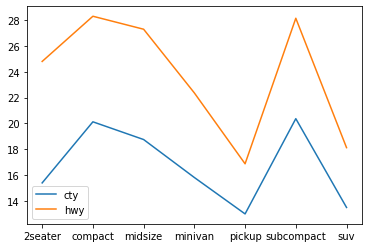

In [157]:
plt.plot(class_group['class'], class_group['cty'], label = 'cty')
plt.plot(class_group['class'], class_group['hwy'], label = 'hwy')
plt.legend()

6) cty, hwy 분포

(array([ 7., 17., 41., 24.,  9., 20., 47., 43., 11.,  6.,  3.,  3.,  0.,
         1.,  2.]),
 array([12.        , 14.13333333, 16.26666667, 18.4       , 20.53333333,
        22.66666667, 24.8       , 26.93333333, 29.06666667, 31.2       ,
        33.33333333, 35.46666667, 37.6       , 39.73333333, 41.86666667,
        44.        ]),
 <BarContainer object of 15 artists>)

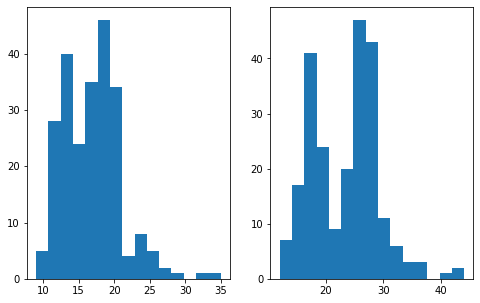

In [158]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,5))
ax[0].hist(mpg['cty'], bins = 15)
ax[1].hist(mpg['hwy'], bins = 15)

titanic 데이터

In [159]:
df = pd.read_csv("C:/Users/samsung/Desktop/datasets/titanic_train.csv")

In [160]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1) Pclass에 따른 생존율

- Pclass 비율

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

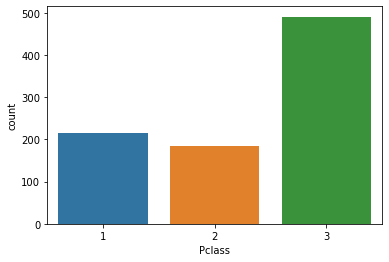

In [162]:
sns.countplot(df['Pclass'])

- Pclass에 따른 생존율

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

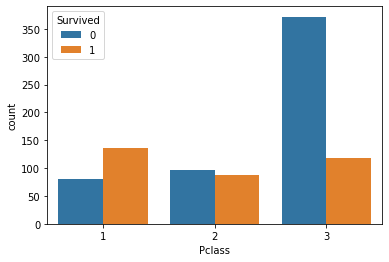

In [163]:
sns.countplot(df['Pclass'], hue = df['Survived']) 
# Pclass가 3일 때 생존율이 가장 낮음

2) Sex에 따른 생존율

- Sex 비율

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

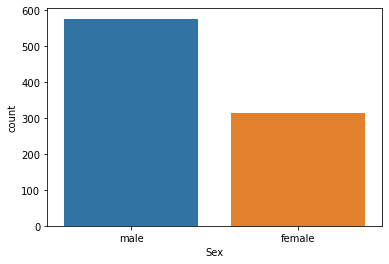

In [164]:
sns.countplot(df['Sex'])

- Sex에 따른 생존율

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

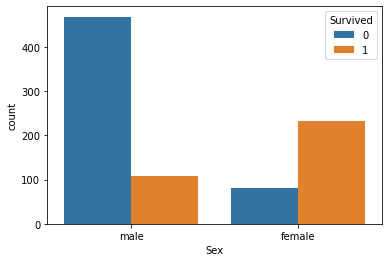

In [165]:
sns.countplot(df['Sex'], hue = df['Survived'])
# 남자는 사망률보다 생존율이 낮고, 여자는 사망률보다 생존율이 높음

3) Age에 따른 생존율

- Age 분포

(array([ 44.,  24.,  32., 104., 115., 127.,  80.,  59.,  49.,  30.,  22.,
         17.,   4.,   6.,   1.]),
 array([ 0.42      ,  5.72533333, 11.03066667, 16.336     , 21.64133333,
        26.94666667, 32.252     , 37.55733333, 42.86266667, 48.168     ,
        53.47333333, 58.77866667, 64.084     , 69.38933333, 74.69466667,
        80.        ]),
 <BarContainer object of 15 artists>)

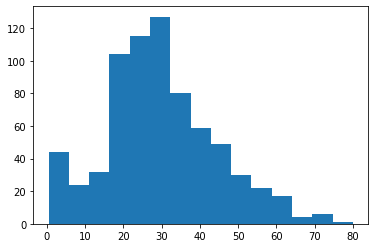

In [166]:
plt.hist(df['Age'], bins = 15)

- 연령대별 생존율

In [167]:
# Age 결측치 제거
df_2 = df.copy()
df_2 = df_2.dropna(subset = ['Age'])

In [168]:
# Age의 구간을 나누고, 해당 구간에 속하는 데이터 개수 확인
Age_arr = np.array(df_2['Age'])
counts, bins = np.histogram(Age_arr, bins = 8)
print(counts)
print(bins)

[ 64 115 230 155  86  42  17   5]
[ 0.42   10.3675 20.315  30.2625 40.21   50.1575 60.105  70.0525 80.    ]


In [169]:
# Survived == 1 인 데이터 추출
Age_Survived = df_2[df_2['Survived'] == 1]
Age_Survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [170]:
# Age 구간별 생존한 사람의 수
Age_arr2 = np.array(Age_Survived['Age'])
counts_2, bins_2 = np.histogram(Age_arr2, bins = 8)
print(counts_2)
print(bins_2)

[38 44 84 69 33 17  4  1]
[ 0.42   10.3675 20.315  30.2625 40.21   50.1575 60.105  70.0525 80.    ]


In [171]:
# Age 구간별 생존율
Survived_rate = counts_2/counts
Survived_rate

array([0.59375   , 0.3826087 , 0.36521739, 0.44516129, 0.38372093,
       0.4047619 , 0.23529412, 0.2       ])

<AxesSubplot:xlabel='Age', ylabel='Density'>

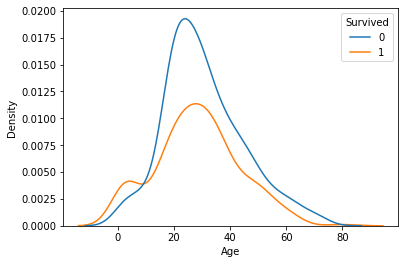

In [172]:
# 10대까지는 사망자 수보다 생존자 수가 더 많음
# 20-30대에 사망자 수와 생존자 수의 차이가 가장 큼
sns.kdeplot(data = df_2, x = 'Age', hue = 'Survived')

4) SibSp에 따른 생존율

In [173]:
df_SibSp = df['SibSp'].value_counts().to_frame()
df_SibSp

,SibSp
0,608
1,209
2,28
4,18
3,16
8,7
5,5


Text(0, 0.5, 'count')

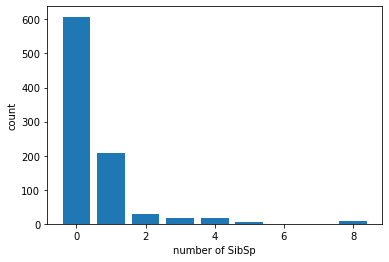

In [174]:
# 형제자매의 수 분포
# 형제자매가 없는 경우가 가장 많음
plt.bar(df_SibSp.index, df_SibSp.SibSp)
plt.xlabel('number of SibSp')
plt.ylabel('count')

In [175]:
# 평균이 0.5, 중앙값이 0으로 데이터의 대부분이 형제자매가 0이거나 1임
# 형제자매의 유무(0,1)에 따른 생존율 확인
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [176]:
# 형제자매 수를 0,1 로 변환
df_3 = df.copy()
df_3['SibSp_num'] = np.where(df['SibSp'] == 0, 0, 1)

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp_num', ylabel='count'>

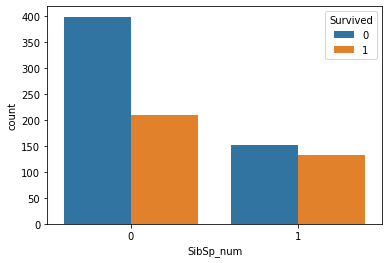

In [177]:
# 형제자매 유무에 따른 생존율
# 형제자매가 없는 경우 상대적으로 생존율이 낮음
sns.countplot(df_3['SibSp_num'], hue = df_3['Survived'])

5) Parch에 따른 생존율

In [178]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

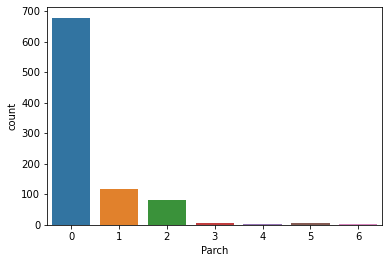

In [179]:
# 부모자녀 수 분포
# 3명 이상인 경우는 매우 적으므로 제외
sns.countplot(df['Parch'])

In [180]:
Parch = df[df['Parch'] <= 2]['Parch']

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

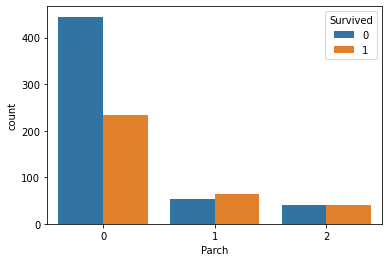

In [181]:
# 부모자녀 수(0,1,2)에 따른 생존율
# 부모자녀가 없는 경우 생존율이 낮고, 1명 또는 2명일 경우 생존율이 높거나 비슷함
sns.countplot(Parch, hue = df['Survived'])

- 동행자 유무에 따른 생존율 (SibSp, Parch)

In [182]:
# 형제자매/부모자녀가 없는 경우와 1명 이상인 경우로 구분
condition = (df['SibSp'] == 0) & (df['Parch'] == 0)

In [183]:
df_3['Sib_par'] = np.where(condition, 0, 1)

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sib_par', ylabel='count'>

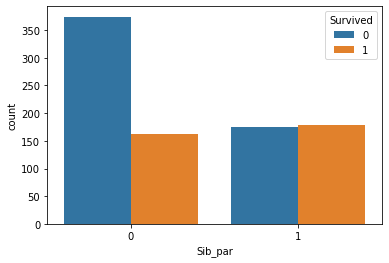

In [184]:
# 동행자가 있는 경우 생존율이 상대적으로 높음
sns.countplot(df_3['Sib_par'], hue = df['Survived'])

6) Fare에 따른 생존율

- 요금 분포 확인

In [185]:
# 표준편차가 크고, 최솟값과 최댓값의 차이도 큰 편
# 중앙값보다 평균이 더 크므로, 극단적으로 높은 요금이 분포함을 확인
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 0, 'Fare')

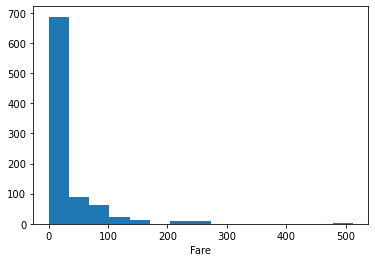

In [186]:
# 대부분이 100 이하 요금에 분포
plt.hist(df['Fare'], bins = 15)
plt.xlabel('Fare')

{'whiskers': [<matplotlib.lines.Line2D at 0x1df3663dca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df3664d280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df3663da30>],
 'medians': [<matplotlib.lines.Line2D at 0x1df3664d820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df3664daf0>],
 'means': []}

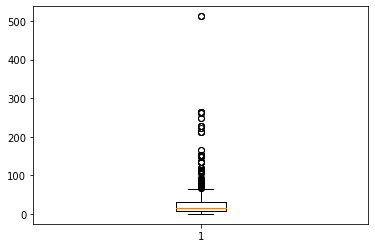

In [187]:
# 이상값 존재
plt.boxplot(df['Fare'])

In [188]:
# 요금이 100보다 높은 데이터는 891 중 53개
df[df['Fare'] > 100]['PassengerId'].count()

53

<AxesSubplot:xlabel='Fare', ylabel='Density'>

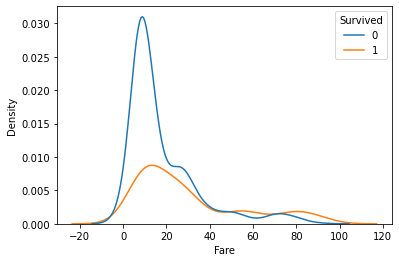

In [189]:
# 요금이 100 이하인 데이터만 추출해 생존율 확인
# 요금이 0-40인 경우 사망률이 더 높고, 그 이 상은 생존율이 더 높거나 비슷함
Fare = df[df['Fare'] <= 100]
sns.kdeplot(data = Fare, x = 'Fare', hue = 'Survived')

- Pclass와 Fare의 상관관계

In [190]:
df[['Pclass', 'Fare']].corr()

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


In [191]:
# 좌석등급별 요금 평균
# 좌석등급이 높을수록 요금이 높음
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

([<matplotlib.axis.YTick at 0x1df36700d30>,
 [Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

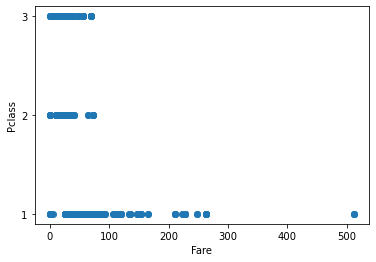

In [192]:
# 요금과 좌석등급 분포
# 요금 대부분이 100 이하이지만, 좌석등급이 1인 경우 높은 요금이 일부 존재
plt.scatter(x = df['Fare'], y = df['Pclass'])
plt.xlabel('Fare')
plt.ylabel('Pclass')
plt.yticks([1,2,3], [1,2,3])

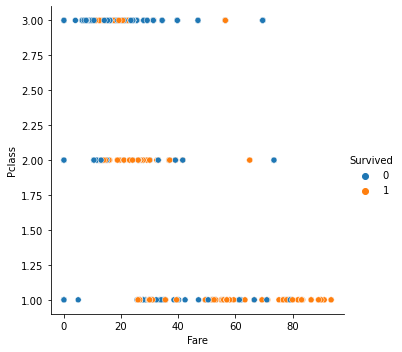

In [193]:
# 좌석등급이 2등급 이상인 경우, 평균요금보다 높을수록 생존율 높은 경향 존재
# 1등급 84.15, 2등급 20.66, 3등급 13.68
sns.relplot(data = Fare, x = 'Fare', y = 'Pclass', hue = 'Survived')

7) Cabin에 따른 생존율

In [194]:
# 결측치가 매우 많음
df['Cabin'].isna().sum()

687

In [195]:
# 결측치를 제외하고 추출
# 객실번호는 A-T까지 
df_cabin = df[df['Cabin'].isna() == False]
df_cabin['Cabin'].sort_values()

583    A10
475    A14
556    A16
284    A19
599    A20
      ... 
394     G6
10      G6
205     G6
251     G6
339      T
Name: Cabin, Length: 204, dtype: object

In [196]:
# 객실번호 알파벳만 추출한 열 생성
cabin_num = [i[0] for i in df_cabin['Cabin']]
df_cabin['cabin_num'] = cabin_num

C:\Users\samsung\AppData\Local\Temp\ipykernel_29272\1350487747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cabin['cabin_num'] = cabin_num


In [202]:
# 객실 분포
df_cabin['cabin_num'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: cabin_num, dtype: int64

<AxesSubplot:xlabel='cabin_num', ylabel='count'>

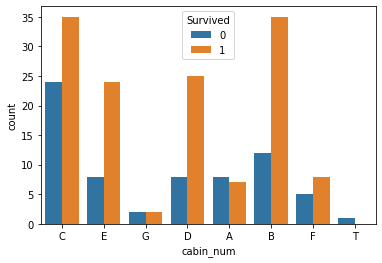

In [199]:
# A를 제외하고는 대부분 생존율이 높음
# 객실의 위치 같은 추가적인 정보 없이 객실 구분만으로는 생존율과의 상관관계를 파악하기 어려움
sns.countplot(df_cabin['cabin_num'], hue = df_cabin['Survived'])

8) Embarked에 따른 생존율

In [203]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

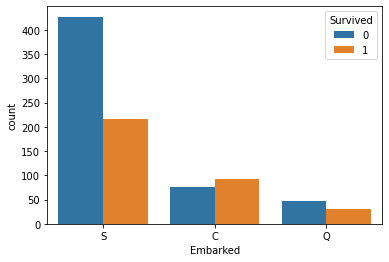

In [204]:
# 도착지가 S,Q인 경우 사망률이 더 높고 C인 경우 생존율이 더 높음
sns.countplot(df['Embarked'], hue = df['Survived'])